<a href="https://colab.research.google.com/github/Joongeun/MIT-Internship-2024/blob/main/BERTopic_for_CCDH_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries & Importing dataset**

In [ ]:
!pip install bertopic

In [16]:
from bertopic import BERTopic
import json
import pandas as pd

In [24]:
import csv
import pandas as pd
import math

df = pd.read_csv("/content/training.csv")
# saved_column = [x for x in saved_column if not (isinstance(x, float) and math.isnan(x))]
# for i in saved_column:
#   if i in ["[deleted]", "[removed]"]:
#     saved_column.remove(i)
print(df)

                                                    text claim
0      What do you do if you are a global warming ala...   5_1
1      (2.) A sun-blocking volcanic aerosols componen...   0_0
2      Now, I am very interested in the AMO, since it...   1_1
3      Dr. Christy addressed recent challenges to the...   0_0
4      After a brief protest from Massachusetts Repub...   0_0
...                                                  ...   ...
23431  Mrner and Parker conclude that the Fremantle t...   1_6
23432  Siegel, Jeremy J., The Concise Encyclopedia of...   0_0
23433  According to Goklany's careful empirical analy...   0_0
23434  In light of these several findings, it can rea...   4_4
23435  Truth n 16 The trace gases absorb the radiatio...   2_3

[23436 rows x 2 columns]


# **Finding the number of texts per sub-claim & Graphing**
There are 5 super-claims and multiple sub-claims for each. "0_0" is just general news articles related to climate changes (not opinionated).

In [19]:
s = set()
for i in df['claim']:
  s.add(i)
d = {i:0 for i in s}
for i in df['claim']:
  d[i]+=1
d = dict(sorted(d.items()))
d

{'0_0': 16302,
 '1_1': 333,
 '1_2': 147,
 '1_3': 229,
 '1_4': 483,
 '1_6': 189,
 '1_7': 427,
 '2_1': 788,
 '2_3': 339,
 '3_1': 207,
 '3_2': 337,
 '3_3': 323,
 '4_1': 328,
 '4_2': 190,
 '4_4': 245,
 '4_5': 182,
 '5_1': 1373,
 '5_2': 1014}

<function matplotlib.pyplot.show(close=None, block=None)>

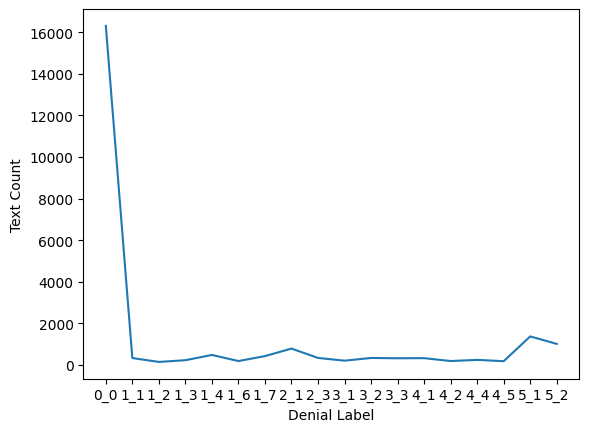

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(list(d.keys()))
y = np.array(list(d.values()))
plt.plot(x, y)
plt.xlabel("Denial Label")
plt.ylabel("Text Count")
plt.show

# **Sample texts for sub-claim "1_1"**

In [14]:
from pprint import pprint
l = list()
for ind, i in enumerate(df['claim']):
  if i == "1_1":
    l.append(df['text'][ind])
pprint(l[:20])

['Now, I am very interested in the AMO, since it strongly influences Atlantic '
 'hurricanes, Arctic sea ice, and Greenland climate. We are already seeing a '
 'recovery of the Atlantic sector of the Arctic sea ice, and some hints of '
 'cooling in Greenland.',
 'I am sure that we can expect to see similar coverage about the 2nd highest '
 'Northern Sea Ice Area minimum, like we saw for the Arctic in 2011, e.g.:',
 'Moreover the WBDGE site writes that Arctic sea ice has grown strongly over '
 'last year and that there has been no melting trend there in almost 10 years.',
 'Since the change point in 2007, September 21 Arctic ice (15% concentration) '
 'extent has been expanding at a linear rate of 247,875 km / year. Using the '
 'standard climate science metric, that is a gain of 4,201 Manhattans per '
 'year.',
 'Last winter had the largest sea ice extent in the last six years, the '
 'largest North American snow extent on record, and the second largest '
 'northern hemisphere snow ext

# **Topic Modeling with BERTopic on all texts**

In [ ]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['text'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10525,-1_the_to_and_of,"[the, to, and, of, that, climate, is, in, for,...",[Does Steven Chu offer a more specific threat ...
1,0,646,0_ice_arctic_antarctic_sea,"[ice, arctic, antarctic, sea, extent, antarcti...",[With Arctic ice extent just 6% below average ...
2,1,395,1_co2_dioxide_temperature_atmospheric,"[co2, dioxide, temperature, atmospheric, doubl...","[For example, when scientists analyzed the rel..."
3,2,330,2_level_sea_rise_tide,"[level, sea, rise, tide, sealevel, mm, levels,...","[Short answer, data to date says no. There has..."
4,3,308,3_epa_epas_clean_air,"[epa, epas, clean, air, act, court, caa, psd, ...",[Senior Fellow Marlo Lewis writes an open lett...
...,...,...,...,...,...
283,282,10,282_pressures_politicians_politically_rewards,"[pressures, politicians, politically, rewards,...",[Politicians have different motives. They expe...
284,283,10,283_wind_power_expensive_electricity,"[wind, power, expensive, electricity, existing...",[Wind energy is also more expensive than almos...
285,284,10,284_yellowstone_volcano_plume_caldera,"[yellowstone, volcano, plume, caldera, active,...",[This images indicates Yellowstone earthquake ...
286,285,10,285_monsoon_rains_rainfall_india,"[monsoon, rains, rainfall, india, indian, paki...","[""Over Pakistan, the weather pattern is just s..."


In [ ]:
freq = topic_model.get_topic_info()
freq.to_csv('ccdh_bert_topics.csv', index=False)

# **Topic Modeling with BERTopic on individual sub-claims**

In [30]:
topic_model = BERTopic()
def categoryTopic(texts, file_name):
  topics, probs = topic_model.fit_transform(texts)
  freq = topic_model.get_topic_info()
  freq.to_csv(f'{file_name}.csv', index=False)
l = list()
for i in sorted(d.keys()):
  l = [df['text'][ind] for ind, claim in enumerate(df['claim']) if claim == i]
  categoryTopic(l, i)